In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
import joblib

In [4]:
import math
import re
from wordcloud import WordCloud

# Data check

## Shape

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(300000, 25)
(200000, 24)


In [6]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [7]:
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada


In [8]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


## Info

In [9]:
def data_summary(data):
    summary = pd.DataFrame(data.dtypes, columns=['Dtype'])
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Count'] = data.shape[0]
    summary['Unique value'] = data.nunique().values
    summary['Null count'] = data.isnull().sum().values
    summary['Null percent'] = data.isnull().sum().values / len(data) * 100
    summary['Null percent'] = round(summary['Null percent'], 1)
    
    return summary

In [10]:
train_summary = data_summary(train)

In [11]:
test_summary = data_summary(test)

In [12]:
summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])
summary

Train                                                 Test            \
         Dtype   Count Unique value Null count Null percent   Dtype     Count   
id       int64  300000       300000          0          0.0   int64  200000.0   
bin_0    int64  300000            2          0          0.0   int64  200000.0   
bin_1    int64  300000            2          0          0.0   int64  200000.0   
bin_2    int64  300000            2          0          0.0   int64  200000.0   
bin_3   object  300000            2          0          0.0  object  200000.0   
bin_4   object  300000            2          0          0.0  object  200000.0   
nom_0   object  300000            3          0          0.0  object  200000.0   
nom_1   object  300000            6          0          0.0  object  200000.0   
nom_2   object  300000            6          0          0.0  object  200000.0   
nom_3   object  300000            6          0          0.0  object  200000.0   
nom_4   object  300000            4          0          0.0  object  200000.0   
nom_5   object  300000          222          0          0.0  object  200000.0   
nom_6   object  300000          522          0          0.0  object  200000.0   
nom_7   object  300000         1220          0          0.0  object  200000.0   
nom_8   object  300000         2215          0          0.0  object  200000.0   
nom_9   object  300000        11981          0          0.0  object  200000.0   
ord_0    int64  300000            3          0          0.0   int64  200000.0   
ord_1   object  300000            5          0          0.0  object  200000.0   
ord_2   object  300000            6          0          0.0  object  200000.0   
ord_3   object  300000           15          0          0.0  object  200000.0   
ord_4   object  300000           26          0          0.0  object  200000.0   
ord_5   object  300000          192          0          0.0  object  200000.0   
day      int64  300000            7          0          0.0   int64  200000.0   
month    int64  300000           12          0          0.0   int64  200000.0   
target   int64  300000            2          0          0.0     NaN       NaN   

                                             
       Unique value Null count Null percent  
id         200000.0        0.0          0.0  
bin_0           2.0        0.0          0.0  
bin_1           2.0        0.0          0.0  
bin_2           2.0        0.0          0.0  
bin_3           2.0        0.0          0.0  
bin_4           2.0        0.0          0.0  
nom_0           3.0        0.0          0.0  
nom_1           6.0        0.0          0.0  
nom_2           6.0        0.0          0.0  
nom_3           6.0        0.0          0.0  
nom_4           4.0        0.0          0.0  
nom_5         222.0        0.0          0.0  
nom_6         522.0        0.0          0.0  
nom_7        1219.0        0.0          0.0  
nom_8        2214.0        0.0          0.0  
nom_9       11839.0        0.0          0.0  
ord_0           3.0        0.0          0.0  
ord_1           5.0        0.0          0.0  
ord_2           6.0        0.0          0.0  
ord_3          15.0        0.0          0.0  
ord_4          26.0        0.0          0.0  
ord_5         192.0        0.0          0.0  
day             7.0        0.0          0.0  
month          12.0        0.0          0.0  
target          NaN        NaN          NaN

In [13]:
train.dtypes.value_counts()

object    17
int64      8
dtype: int64

In [14]:
test.dtypes.value_counts()

object    17
int64      7
dtype: int64

## 불필요 columns 제거

In [15]:
train.drop('id', axis=1, inplace=True)

In [16]:
test.drop('id', axis=1, inplace=True)

In [17]:
train_summary = data_summary(train)

In [18]:
test_summary = data_summary(test)

In [19]:
summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])
summary

Train                                                 Test            \
         Dtype   Count Unique value Null count Null percent   Dtype     Count   
bin_0    int64  300000            2          0          0.0   int64  200000.0   
bin_1    int64  300000            2          0          0.0   int64  200000.0   
bin_2    int64  300000            2          0          0.0   int64  200000.0   
bin_3   object  300000            2          0          0.0  object  200000.0   
bin_4   object  300000            2          0          0.0  object  200000.0   
nom_0   object  300000            3          0          0.0  object  200000.0   
nom_1   object  300000            6          0          0.0  object  200000.0   
nom_2   object  300000            6          0          0.0  object  200000.0   
nom_3   object  300000            6          0          0.0  object  200000.0   
nom_4   object  300000            4          0          0.0  object  200000.0   
nom_5   object  300000          222          0          0.0  object  200000.0   
nom_6   object  300000          522          0          0.0  object  200000.0   
nom_7   object  300000         1220          0          0.0  object  200000.0   
nom_8   object  300000         2215          0          0.0  object  200000.0   
nom_9   object  300000        11981          0          0.0  object  200000.0   
ord_0    int64  300000            3          0          0.0   int64  200000.0   
ord_1   object  300000            5          0          0.0  object  200000.0   
ord_2   object  300000            6          0          0.0  object  200000.0   
ord_3   object  300000           15          0          0.0  object  200000.0   
ord_4   object  300000           26          0          0.0  object  200000.0   
ord_5   object  300000          192          0          0.0  object  200000.0   
day      int64  300000            7          0          0.0   int64  200000.0   
month    int64  300000           12          0          0.0   int64  200000.0   
target   int64  300000            2          0          0.0     NaN       NaN   

                                             
       Unique value Null count Null percent  
bin_0           2.0        0.0          0.0  
bin_1           2.0        0.0          0.0  
bin_2           2.0        0.0          0.0  
bin_3           2.0        0.0          0.0  
bin_4           2.0        0.0          0.0  
nom_0           3.0        0.0          0.0  
nom_1           6.0        0.0          0.0  
nom_2           6.0        0.0          0.0  
nom_3           6.0        0.0          0.0  
nom_4           4.0        0.0          0.0  
nom_5         222.0        0.0          0.0  
nom_6         522.0        0.0          0.0  
nom_7        1219.0        0.0          0.0  
nom_8        2214.0        0.0          0.0  
nom_9       11839.0        0.0          0.0  
ord_0           3.0        0.0          0.0  
ord_1           5.0        0.0          0.0  
ord_2           6.0        0.0          0.0  
ord_3          15.0        0.0          0.0  
ord_4          26.0        0.0          0.0  
ord_5         192.0        0.0          0.0  
day             7.0        0.0          0.0  
month          12.0        0.0          0.0  
target          NaN        NaN          NaN

## 고유값 확인

In [20]:
for column in train.columns :
    print(f'{column} : {train[column].unique()}', '\n')

bin_0 : [0 1] 

bin_1 : [0 1] 

bin_2 : [0 1] 

bin_3 : ['T' 'F'] 

bin_4 : ['Y' 'N'] 

nom_0 : ['Green' 'Blue' 'Red'] 

nom_1 : ['Triangle' 'Trapezoid' 'Polygon' 'Square' 'Star' 'Circle'] 

nom_2 : ['Snake' 'Hamster' 'Lion' 'Cat' 'Dog' 'Axolotl'] 

nom_3 : ['Finland' 'Russia' 'Canada' 'Costa Rica' 'China' 'India'] 

nom_4 : ['Bassoon' 'Piano' 'Theremin' 'Oboe'] 

nom_5 : ['50f116bcf' 'b3b4d25d0' '3263bdce5' 'f12246592' '5b0f5acd5' '46cab09da'
 'be5592604' '72f8028dc' '4604905e7' 'ad95dc0ee' '2ff007c26' 'a35c346aa'
 'dbfb714a4' 'e1558b071' '39647c92a' 'ee55b9d67' '416a8f3ab' '91bde92fa'
 '3aa9329e2' '568550f04' 'caf83c0b5' '908a1b9c9' 'e844a1f66' 'dbc448931'
 '2979f0d45' '96c73114c' 'b7bb45938' '7da3e4aec' 'be4578201' 'dc07effb0'
 '88917a066' 'f2d59cf51' '5d18641ff' '9347491f2' '475e79160' 'e70a6270d'
 '5b1a9f841' 'e0efe9d20' 'd1b1709e8' '9bb7ea2da' '6fec43dd8' '0dee9b39a'
 '527ded12a' '321bf770e' 'f7821e391' '0de4acd31' '185ba0a59' '4845cc770'
 'bdb9fef4a' '3fef1a765' '2cc9e16b9' 'fd0

nom_7 : ['68f6ad3e9' '3b6dd5612' 'a6a36f527' ... '7aaa810eb' '74a1b69b1'
 '3460d7c4b'] 

nom_8 : ['c389000ab' '4cd920251' 'de9c9f684' ... '5361d3b53' 'e4d784581'
 '44f729e5a'] 

nom_9 : ['2f4cb3d51' 'f83c56c21' 'ae6800dd0' ... 'c9751f01d' '3b51e3e0d'
 'e05e4c676'] 

ord_0 : [2 1 3] 

ord_1 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master'] 

ord_2 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm'] 

ord_3 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm'] 

ord_4 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M'] 

ord_5 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'e

In [21]:
summary[summary['Train']['Unique value'] != summary['Test']['Unique value']]

Train                                                 Test            \
         Dtype   Count Unique value Null count Null percent   Dtype     Count   
nom_7   object  300000         1220          0          0.0  object  200000.0   
nom_8   object  300000         2215          0          0.0  object  200000.0   
nom_9   object  300000        11981          0          0.0  object  200000.0   
target   int64  300000            2          0          0.0     NaN       NaN   

                                             
       Unique value Null count Null percent  
nom_7        1219.0        0.0          0.0  
nom_8        2214.0        0.0          0.0  
nom_9       11839.0        0.0          0.0  
target          NaN        NaN          NaN

In [22]:
# One-hot-encoding 시 주의해야 할 column들
summary[(summary['Train']['Unique value'] != summary['Test']['Unique value'])
                        & (summary['Train']['Dtype'] == 'object')]

Train                                                 Test            \
        Dtype   Count Unique value Null count Null percent   Dtype     Count   
nom_7  object  300000         1220          0          0.0  object  200000.0   
nom_8  object  300000         2215          0          0.0  object  200000.0   
nom_9  object  300000        11981          0          0.0  object  200000.0   

                                            
      Unique value Null count Null percent  
nom_7       1219.0        0.0          0.0  
nom_8       2214.0        0.0          0.0  
nom_9      11839.0        0.0          0.0

In [23]:
# 고유값이 너무 많은 column들
columns_many = summary[(summary['Train']['Unique value'] > 100) & (summary['Train']['Dtype'] == 'object')]
columns_many

Train                                                 Test            \
        Dtype   Count Unique value Null count Null percent   Dtype     Count   
nom_5  object  300000          222          0          0.0  object  200000.0   
nom_6  object  300000          522          0          0.0  object  200000.0   
nom_7  object  300000         1220          0          0.0  object  200000.0   
nom_8  object  300000         2215          0          0.0  object  200000.0   
nom_9  object  300000        11981          0          0.0  object  200000.0   
ord_5  object  300000          192          0          0.0  object  200000.0   

                                            
      Unique value Null count Null percent  
nom_5        222.0        0.0          0.0  
nom_6        522.0        0.0          0.0  
nom_7       1219.0        0.0          0.0  
nom_8       2214.0        0.0          0.0  
nom_9      11839.0        0.0          0.0  
ord_5        192.0        0.0          0.0

In [24]:
list(columns_many.index)

['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_5']

## 결측치 확인

In [25]:
train_null = train_summary[train_summary['Null count'] > 0]

In [26]:
test_null = test_summary[test_summary['Null count'] > 0]

In [27]:
null_columns = pd.concat([train_null, test_null], axis=1, keys=['Train', 'Test'])
null_columns

Empty DataFrame
Columns: [(Train, Dtype), (Train, Count), (Train, Unique value), (Train, Null count), (Train, Null percent), (Test, Dtype), (Test, Count), (Test, Unique value), (Test, Null count), (Test, Null percent)]
Index: []

In [28]:
train[null_columns.index].dtypes.value_counts()

Series([], dtype: int64)

In [29]:
test[null_columns.index].dtypes.value_counts()

Series([], dtype: int64)

# 통계 및 분포 확인

## 수치형 data

In [30]:
train.describe()

,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


In [31]:
columns_num = train.describe().columns

array([[<AxesSubplot:title={'center':'bin_0'}>,
        <AxesSubplot:title={'center':'bin_1'}>,
        <AxesSubplot:title={'center':'bin_2'}>],
       [<AxesSubplot:title={'center':'ord_0'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

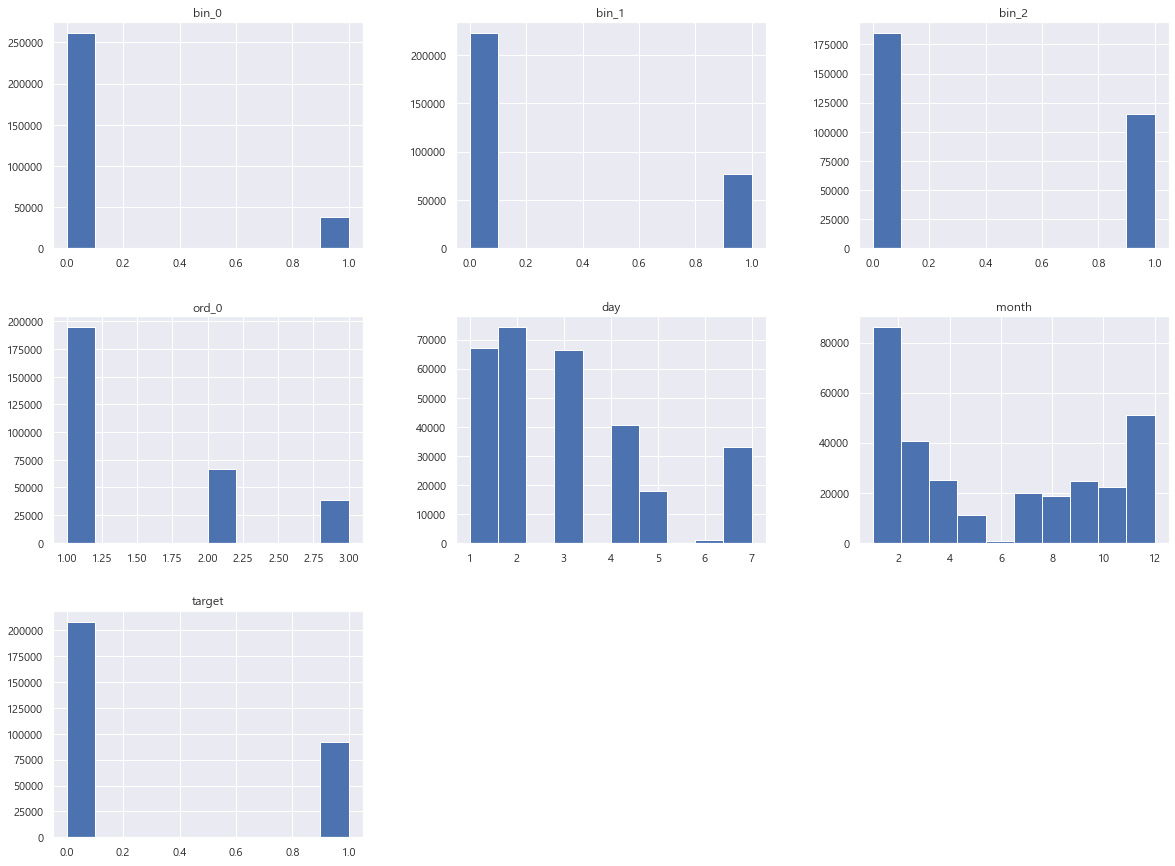

In [32]:
train[columns_num].hist(figsize=(20,15))

In [33]:
test.describe()

,bin_0,bin_1,bin_2,ord_0,day,month
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.127075,0.255865,0.384280,1.477820,3.014070,5.776955
std,0.333058,0.436347,0.486426,0.711056,1.817248,3.850783
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000
75%,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000


In [34]:
columns_num = test.describe().columns

array([[<AxesSubplot:title={'center':'bin_0'}>,
        <AxesSubplot:title={'center':'bin_1'}>],
       [<AxesSubplot:title={'center':'bin_2'}>,
        <AxesSubplot:title={'center':'ord_0'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

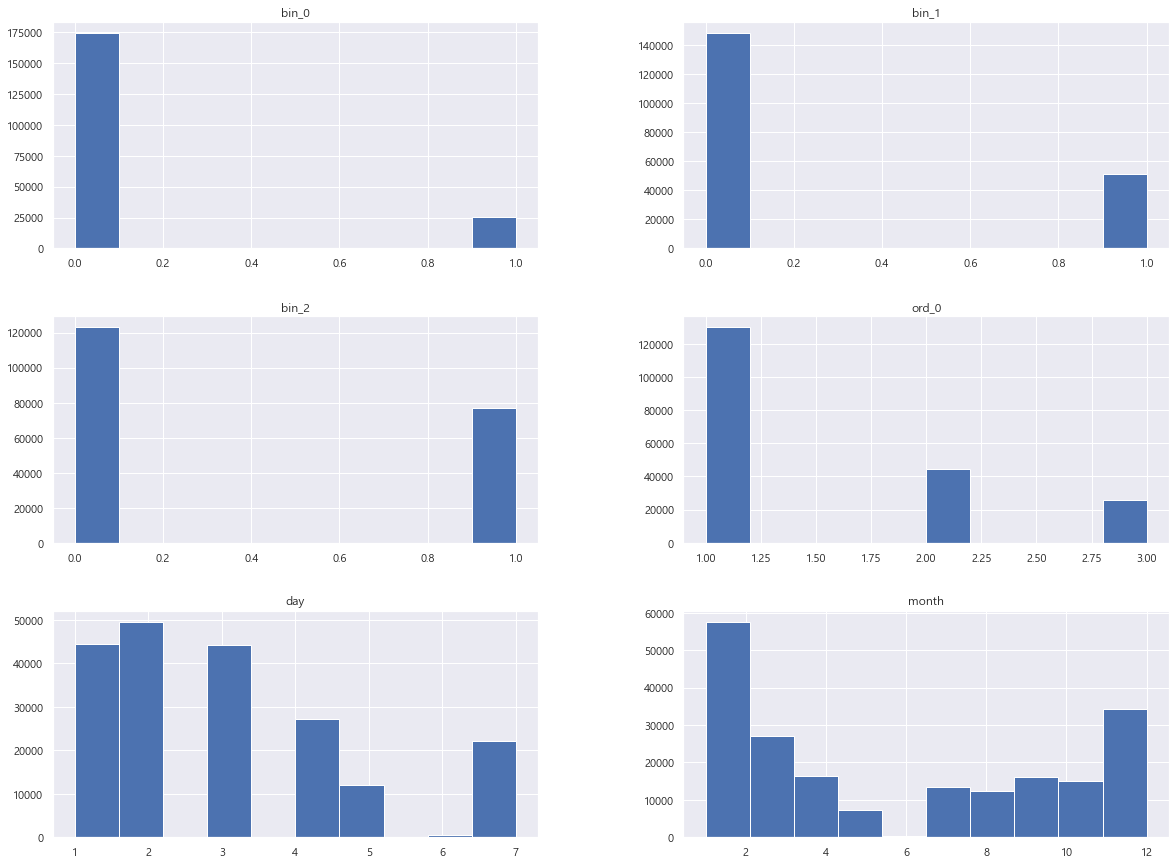

In [35]:
test[columns_num].hist(figsize=(20,15))

### 범주형 data 추출

In [36]:
columns_int = list(train.select_dtypes(include=['int64']).columns)
columns_int

['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month', 'target']

In [37]:
columns_int.remove('target')

In [38]:
columns_float = list(train.select_dtypes(include=['float64']).columns)
columns_float

[]

In [39]:
columns_to_cat = columns_int + columns_float
columns_to_cat

['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month']

### binary data 추출

In [40]:
columns_binary_num = list(train_summary[(train_summary['Dtype'] == 'int64') & (train_summary['Unique value'] == 2)].index)
columns_binary_num

['bin_0', 'bin_1', 'bin_2', 'target']

In [41]:
columns_binary_num.remove('target')

In [42]:
joblib.dump(columns_binary_num, 'columns_binary_num.pkl')

['columns_binary_num.pkl']

## 범주형 data

In [43]:
columns_str = list(train.select_dtypes(include=['object']).columns)
columns_str

['bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5']

In [44]:
columns_bool = list(train.select_dtypes(include=['bool']).columns)
columns_bool

[]

In [45]:
columns_cat = columns_str + columns_bool + columns_to_cat
columns_cat

['bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5',
 'bin_0',
 'bin_1',
 'bin_2',
 'ord_0',
 'day',
 'month']

In [46]:
columns_dt = []

In [47]:
for column in columns_dt :
    columns_cat.remove(column)

In [48]:
joblib.dump(columns_cat, 'columns_cat.pkl')

['columns_cat.pkl']

In [49]:
joblib.dump(columns_dt, 'columns_dt.pkl')

['columns_dt.pkl']

### train data

In [50]:
# value값을 20개 이하로 가지는 column을 선택
# value값이 너무 많으면 countplot을 그리는데 시간이 너무 많이 소요됨
columns_cat_count = []

for column in columns_cat :
    
    if len(train[column].value_counts()) <= 20 :
        columns_cat_count.append(column)

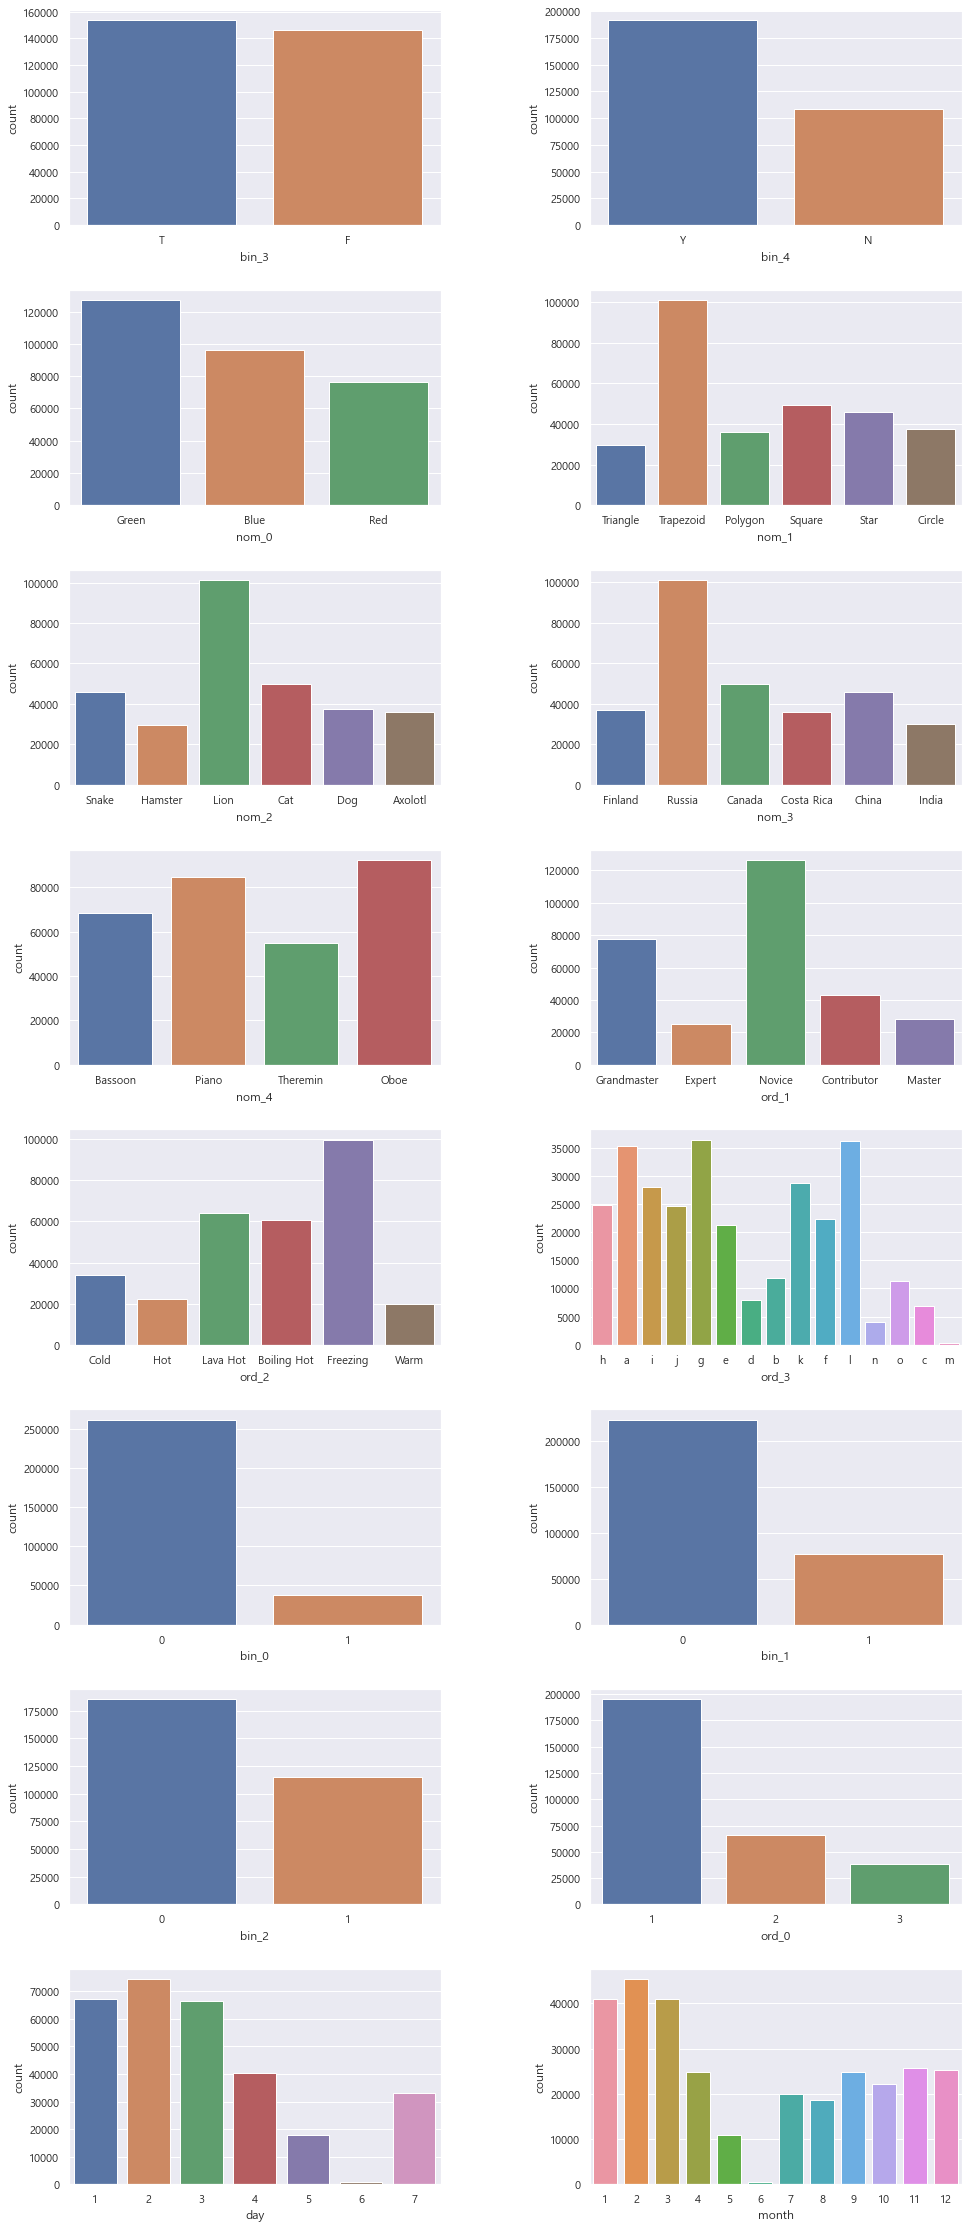

In [51]:
k = len(columns_cat_count)
m = math.ceil(k / 2)

plt.figure(figsize=(16, 5 * m))
grid = plt.GridSpec(m, 2, wspace=0.4, hspace=0.3)

for i in range(k) :    
    ax = plt.subplot(grid[i])
    sns.countplot(data=train, x=columns_cat_count[i], ax=ax)

### test data

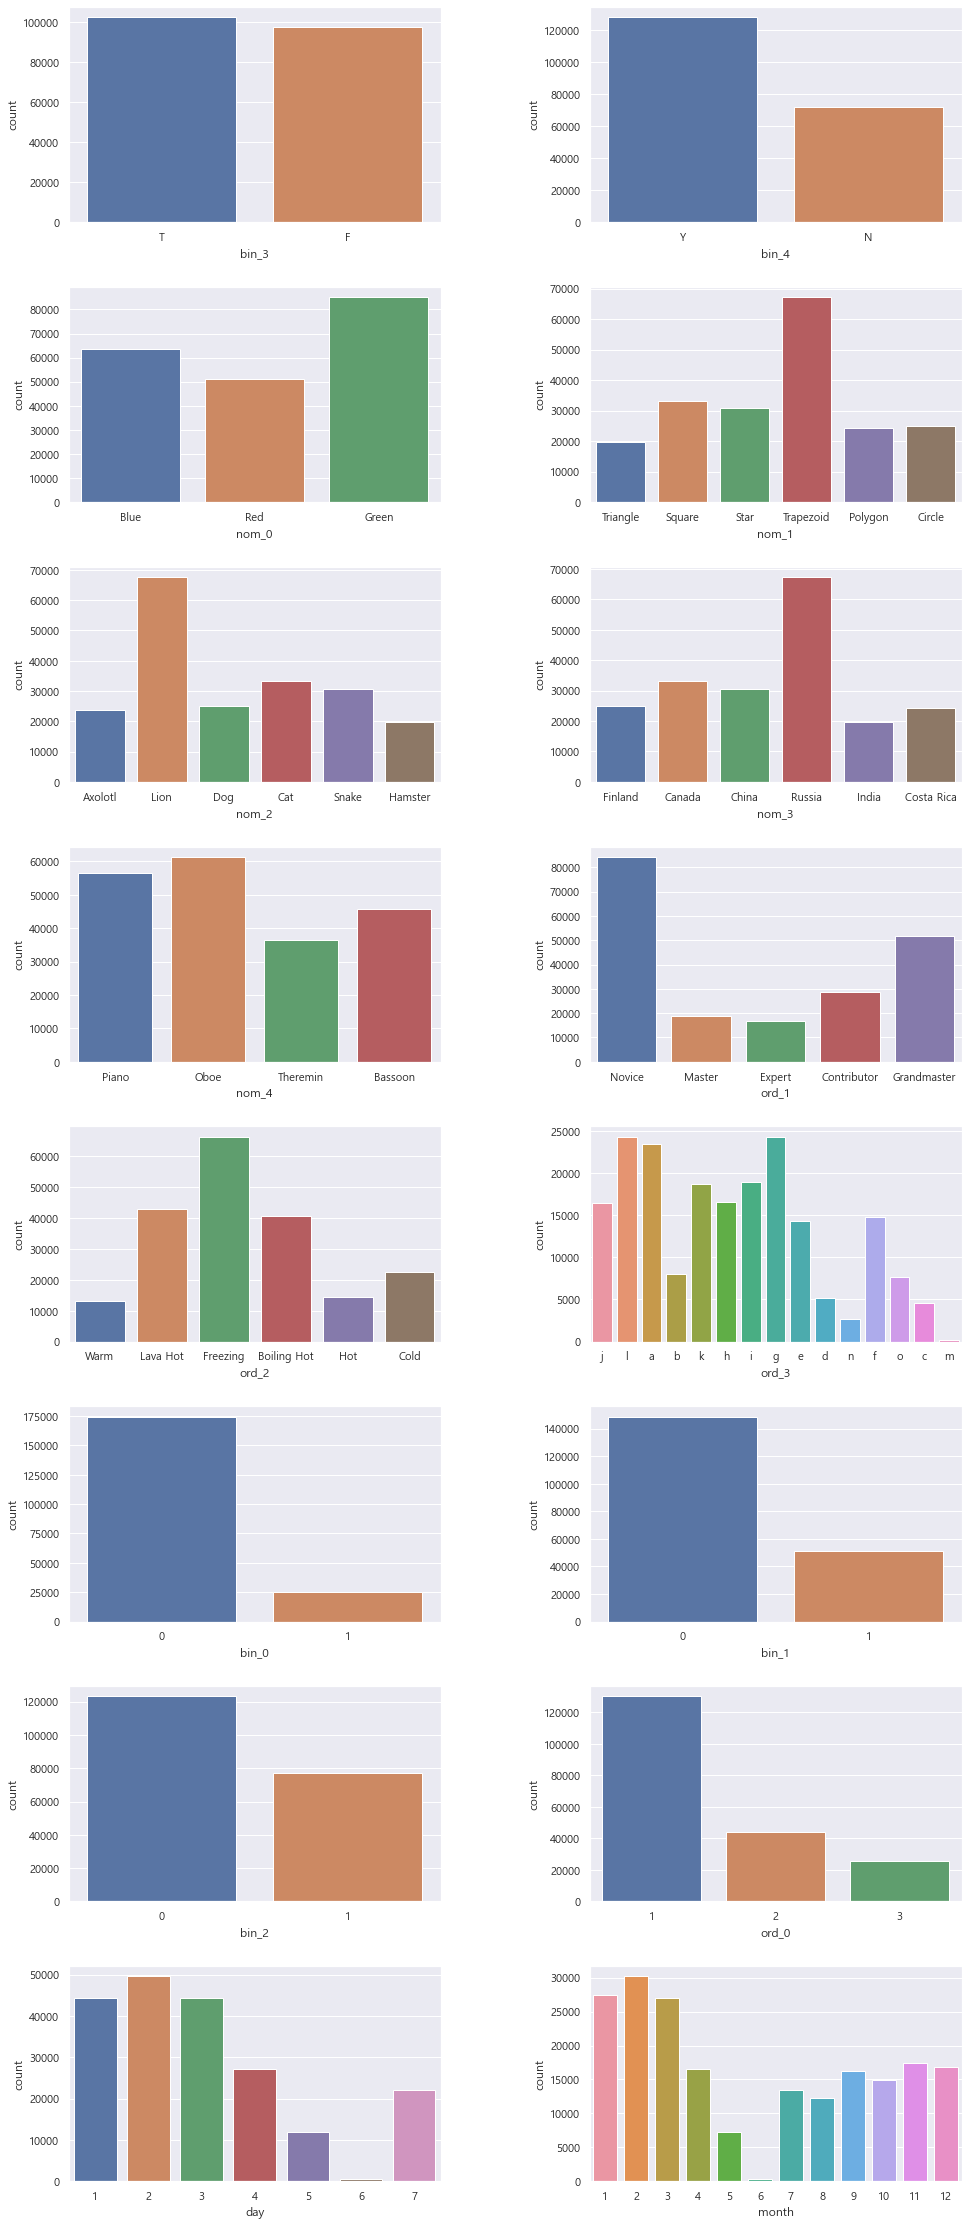

In [52]:
k = len(columns_cat_count)
m = math.ceil(k / 2)

plt.figure(figsize=(16, 5 * m))
grid = plt.GridSpec(m, 2, wspace=0.4, hspace=0.3)

for i in range(k) :    
    ax = plt.subplot(grid[i])
    sns.countplot(data=test, x=columns_cat_count[i], ax=ax)

### 전체 dataset

In [53]:
data_total = pd.concat([train, test], axis=0, ignore_index=True)
data_total.loc[:len(train), 'dataset'] = 'Train'
data_total.loc[len(train):, 'dataset'] = 'Test'

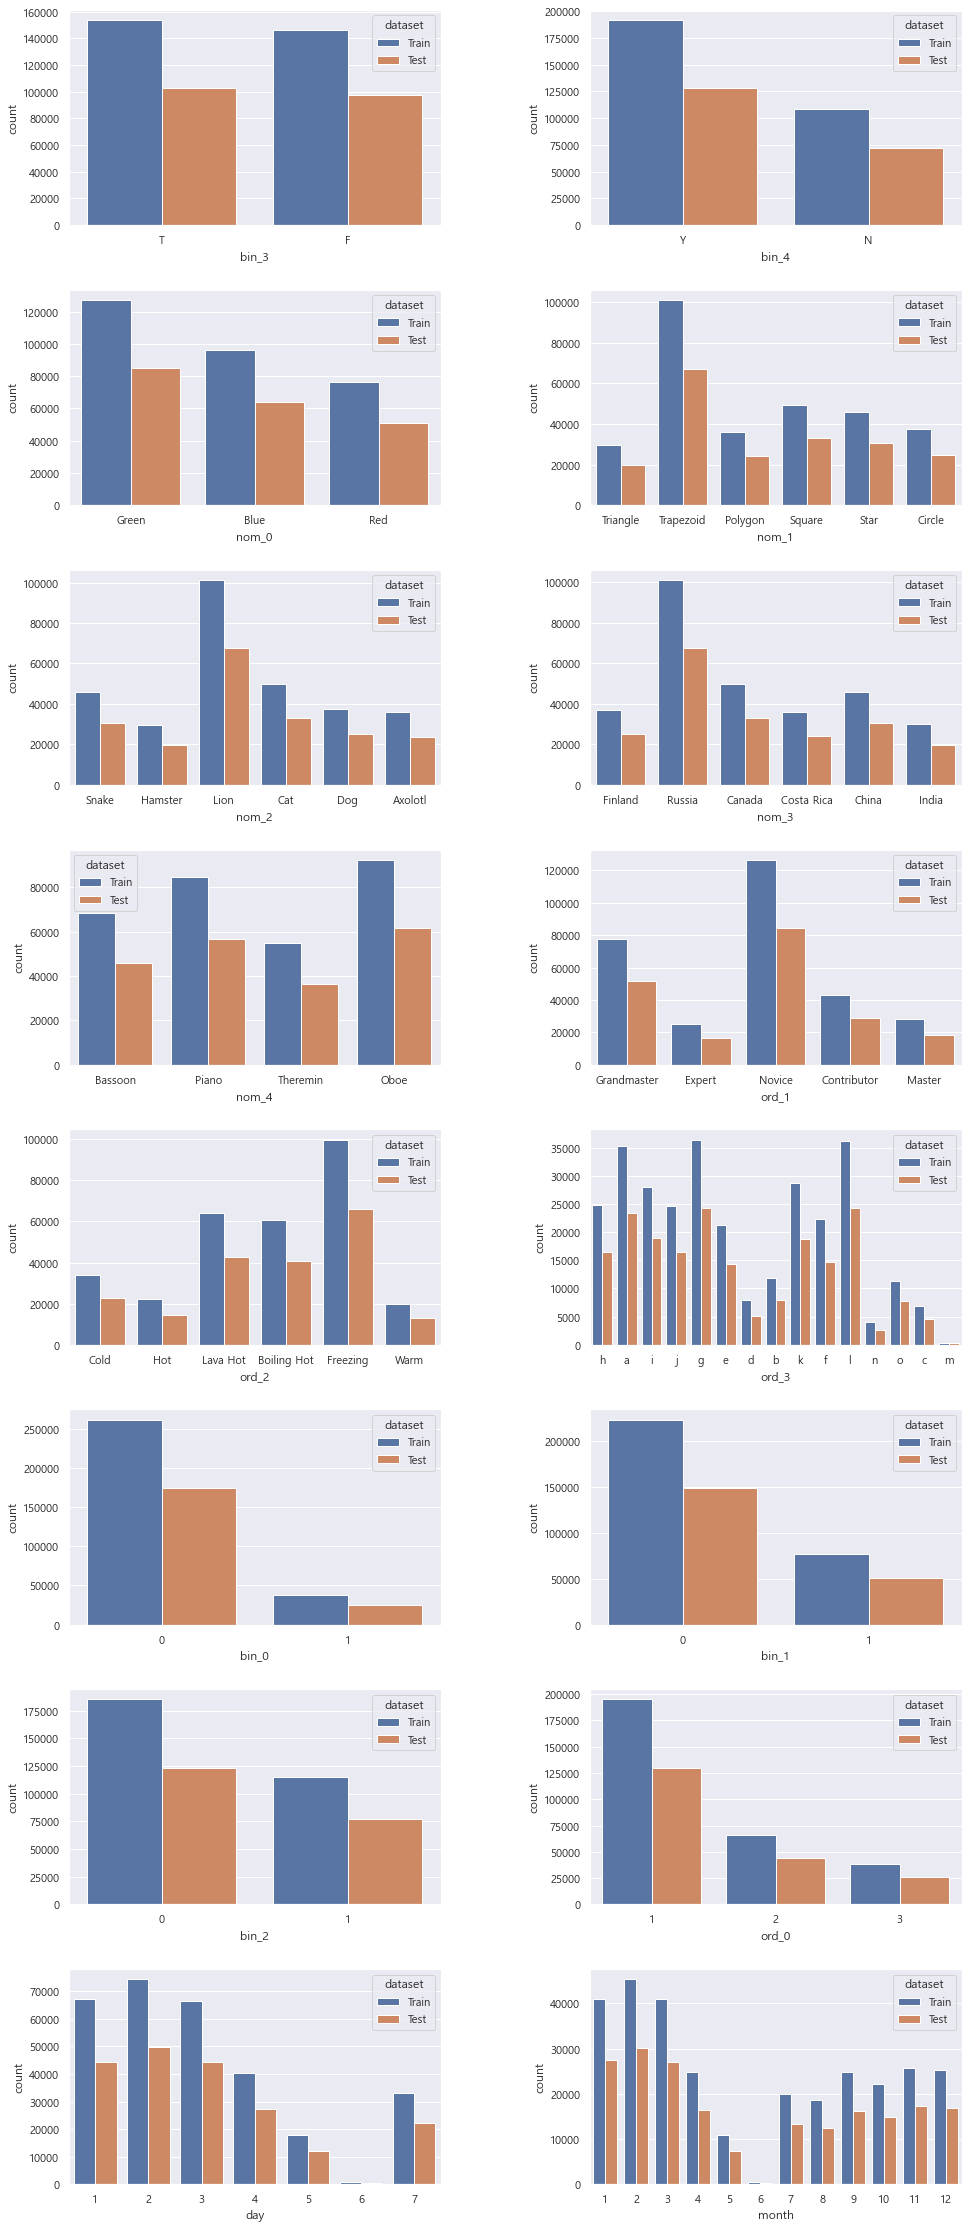

In [54]:
k = len(columns_cat_count)
m = math.ceil(k / 2)

plt.figure(figsize=(16, 5 * m))
grid = plt.GridSpec(m, 2, wspace=0.4, hspace=0.3)

for i in range(k) :    
    ax = plt.subplot(grid[i])
    sns.countplot(data=data_total, x=columns_cat_count[i], hue='dataset', ax=ax)

### binary data 추출

In [55]:
columns_binary_cat = list(train_summary[(train_summary['Dtype'] == 'object') & (train_summary['Unique value'] == 2)].index)
columns_binary_cat

['bin_3', 'bin_4']

In [56]:
# columns_binary_cat.remove('target')

In [57]:
joblib.dump(columns_binary_cat, 'columns_binary_cat.pkl')

['columns_binary_cat.pkl']